<a href="https://colab.research.google.com/github/jbarker6706/Portfolio6/blob/master/VGG16ModelforNCS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

# load the model
model = Sequential()
model.add(VGG16(include_top=False, input_shape=(224,224,3)))

model.add(Flatten())
model.add(Dense(4))

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 100356    
Total params: 14,815,044
Trainable params: 14,815,044
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras import models
from keras import layers
from keras import optimizers

from keras.applications import VGG16
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)



<keras.engine.input_layer.InputLayer object at 0x7f1c09b2ecc0> False
<keras.layers.convolutional.Conv2D object at 0x7f1c09b2ed68> False
<keras.layers.convolutional.Conv2D object at 0x7f1c09b2ef28> False
<keras.layers.pooling.MaxPooling2D object at 0x7f1c09ab9630> False
<keras.layers.convolutional.Conv2D object at 0x7f1c09abfe80> False
<keras.layers.convolutional.Conv2D object at 0x7f1c09ac6ef0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f1c09adbef0> False
<keras.layers.convolutional.Conv2D object at 0x7f1c09ad4e10> False
<keras.layers.convolutional.Conv2D object at 0x7f1c09ae8f60> False
<keras.layers.convolutional.Conv2D object at 0x7f1c09ae1f28> False
<keras.layers.pooling.MaxPooling2D object at 0x7f1c09a79cc0> False
<keras.layers.convolutional.Conv2D object at 0x7f1c09a874a8> False
<keras.layers.convolutional.Conv2D object at 0x7f1c09a8c7f0> False
<keras.layers.convolutional.Conv2D object at 0x7f1c09a94a90> False
<keras.layers.pooling.MaxPooling2D object at 0x7f1c09aa37b8>

In [0]:
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 4100      
Total params: 40,409,924
Trainable params: 32,774,660
Non-trainable params: 7,635,264
_________________________________________________________________


In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = './train/'
validation_dir = './Validation/'
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 100
val_batchsize = 10
 
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)


Found 131 images belonging to 4 classes.
Found 37 images belonging to 4 classes.


In [0]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)
 
# Save the model
model.save('small_last4.h5')


Epoch 1/30
2/1 [=============================================] - 8s 4s/step - loss: 1.9758 - acc: 0.4122 - val_loss: 5.9646 - val_acc: 0.5676
Epoch 2/30
2/1 [=============================================] - 2s 1s/step - loss: 2.1462 - acc: 0.4351 - val_loss: 1.9280 - val_acc: 0.6486
Epoch 3/30
2/1 [=============================================] - 4s 2s/step - loss: 0.9547 - acc: 0.5725 - val_loss: 1.8233 - val_acc: 0.5676
Epoch 4/30
2/1 [=============================================] - 4s 2s/step - loss: 1.3112 - acc: 0.5496 - val_loss: 1.2828 - val_acc: 0.6486
Epoch 5/30
2/1 [=============================================] - 5s 2s/step - loss: 0.9867 - acc: 0.5954 - val_loss: 1.2779 - val_acc: 0.8108
Epoch 6/30
2/1 [=============================================] - 4s 2s/step - loss: 0.4600 - acc: 0.8092 - val_loss: 1.2070 - val_acc: 0.8108
Epoch 7/30
2/1 [=============================================] - 4s 2s/step - loss: 0.4196 - acc: 0.8550 - val_loss: 1.1216 - val_acc: 0.7297
Epoch 

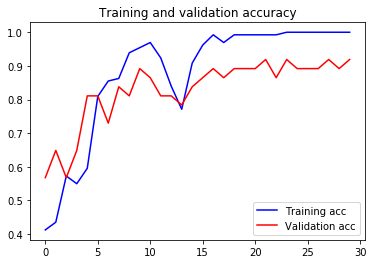

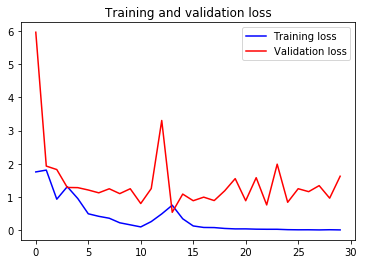

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline  

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

Found 37 images belonging to 4 classes.
4/3 [================================] - 1s 272ms/step
No of errors = 3/37


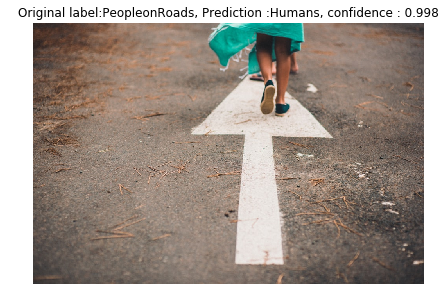

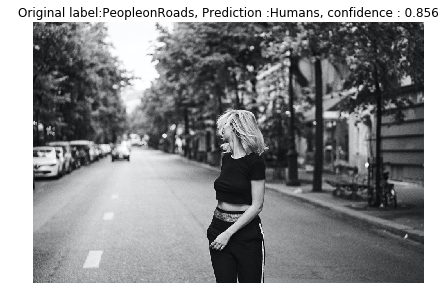

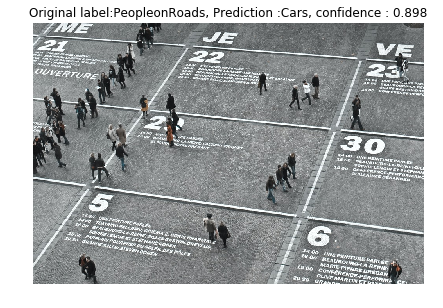

In [0]:
import numpy as np

# Create a generator for prediction
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)
 
# Get the filenames from the generator
fnames = validation_generator.filenames
 
# Get the ground truth from generator
ground_truth = validation_generator.classes
 
# Get the label to class mapping from the generator
label2index = validation_generator.class_indices
 
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())
 
# Get the predictions from the model using the generator
predictions = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)
 
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))
 
# Show the errors
for i in range(len(errors)):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
     
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class])
     
    original = load_img('{}/{}'.format(validation_dir,fnames[errors[i]]))
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()

In [0]:
# load an image from file
image = load_img('womaninstreet.png', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))